In [5]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import scipy.integrate as integrate
import math
import importlib
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r'C:\Users\ahanks\DoseNet\radwatch-analysis')

In [6]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [7]:
import naa_isotope_analyzer as naa
importlib.reload(naa)

<module 'naa_isotope_analyzer' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [8]:
spec_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe'
ecal_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\11-19-2019-Calibration.Ent'
bg_spec = Spectrum.from_file(r"C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe")
spec_01_30 = Spectrum.from_file(spec_filename)

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe
SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe


In [9]:
def apply_ecal(spec, ecal_filename):
    e_cal = np.loadtxt(ecal_filename)
    e_cal_energies=e_cal[:,0]
    e_cal_channels=e_cal[:,1]
    cal = bq.LinearEnergyCal.from_points(e_cal_channels,e_cal_energies)
    spec.apply_calibration(cal)
    return spec

In [10]:
def get_energies(spec):
    kernel = bq.GaussianPeakFilter(4250,30, fwhm_at_0=10)
    finder = bq.PeakFinder(spec, kernel)
    plt.figure()
    plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
    plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
    plt.plot(finder._bkg.clip(1e-1), label='Continuum')
    plt.plot(finder._signal.clip(1e-1), label='Peaks')
    plt.yscale('log')
    plt.xlim(0, len(spec))
    plt.ylim(3e-1)
    plt.xlabel('Channels')
    plt.ylabel('Counts')
    plt.legend()
    plt.tight_layout()
    
    finder.reset()
    finder.find_peaks(min_snr=10, xmin=50)

    plt.figure()
    plt.title('find_peaks')
    finder.plot()
    plt.tight_layout()
    
    energies = np.take(spec.bin_edges_kev,finder.centroids)
    print(finder.centroids)
    print(energies)
    return energies

In [11]:
def get_isotopes(energies):
    hl_cut = 3600
    br_cut =4.0
    df = naa.naa_isotope_analyzer(energies.tolist(),hl_cut,br_cut)
    
    return df

In [12]:
spec_01_30 = apply_ecal(spec_01_30, ecal_filename)
bg_spec = apply_ecal(bg_spec, ecal_filename)

[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[ 508.36293069  556.60889225  616.28152893  653.73563067  695.31603176
  773.08090402  824.18353436 1039.7033232  1311.72167229 1362.82430263
 1468.52104738 1518.67145479 1724.98642202 2234.10827959 2562.62518894
 2606.11003588]


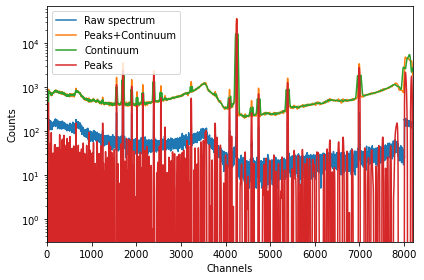

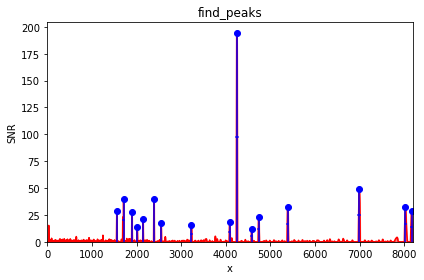

In [13]:
spec1_energies = get_energies(spec_01_30)

In [14]:
spec1_energies = spec1_energies.tolist()

In [15]:
spec1_energies

[508.3629306881238,
 556.6088922539831,
 616.2815289275459,
 653.7356306694629,
 695.3160317558285,
 773.0809040165884,
 824.1835343593737,
 1039.703323196337,
 1311.7216722880564,
 1362.8243026308417,
 1468.5210473770992,
 1518.6714547942422,
 1724.9864220166667,
 2234.1082795932343,
 2562.6251889397104,
 2606.1100358773597]

In [16]:
spec1_energies_corrected = spec1_energies[0:-2]
#spec1_energies_corrected[1] = 553.5
#spec1_energies_corrected.insert(2,560.1)
spec1_energies_corrected

[508.3629306881238,
 556.6088922539831,
 616.2815289275459,
 653.7356306694629,
 695.3160317558285,
 773.0809040165884,
 824.1835343593737,
 1039.703323196337,
 1311.7216722880564,
 1362.8243026308417,
 1468.5210473770992,
 1518.6714547942422,
 1724.9864220166667,
 2234.1082795932343]

In [17]:
peakfitter = PF.PF(spec_01_30,bg_spec,np.array(spec1_energies_corrected))

In [18]:
pf_results = peakfitter.get_counts()
pf_results

AttributeError: 'numpy.ndarray' object has no attribute 'counts_vals'

In [ ]:
for i in range(len(pf_results)):
    try:
        peakfitter.fitters[i].custom_plot()
    except:
        pass

In [ ]:
df = get_isotopes(spec_01_30)
df

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-3hr.Spe"
spec_01_03 = Spectrum.from_file(spec_filename)
spec_01_03 = apply_ecal(spec_01_03,ecal_filename)
df2 = get_isotopes(spec_01_03)

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1901-24hr.Spe"
spec_01_24 = Spectrum.from_file(spec_filename)
spec_01_24 = apply_ecal(spec_01_24,ecal_filename)
df3 = get_isotopes(spec_01_24)
df3

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-30min.Spe"
spec_02_30 = Spectrum.from_file(spec_filename)
spec_02_30 = apply_ecal(spec_02_30,ecal_filename)
df4 = get_isotopes(spec_02_30)
df4

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-3hr.Spe"
spec_02_03 = Spectrum.from_file(spec_filename)
spec_02_03 = apply_ecal(spec_02_03,ecal_filename)
df5 = get_isotopes(spec_02_03)
df5

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1902-24hr.Spe"
spec_02_24 = Spectrum.from_file(spec_filename)
spec_02_24 = apply_ecal(spec_02_24,ecal_filename)
df6 = get_isotopes(spec_02_24)
df6

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-30min.Spe"
spec_03_30 = Spectrum.from_file(spec_filename)
spec_03_30 = apply_ecal(spec_03_30,ecal_filename)
df7 = get_isotopes(spec_03_30)
df7

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-3hr.Spe"
spec_03_03 = Spectrum.from_file(spec_filename)
spec_03_03 = apply_ecal(spec_03_03,ecal_filename)
df8 = get_isotopes(spec_03_03)
df8

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1903-24hr.Spe"
spec_03_24 = Spectrum.from_file(spec_filename)
spec_03_24 = apply_ecal(spec_03_24,ecal_filename)
df9 = get_isotopes(spec_03_24)
df9

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-30min.Spe"
spec_04_30 = Spectrum.from_file(spec_filename)
spec_04_30 = apply_ecal(spec_04_30,ecal_filename)
df10 = get_isotopes(spec_04_30)
df10

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-3hr.Spe"
spec_04_03 = Spectrum.from_file(spec_filename)
spec_04_03 = apply_ecal(spec_04_03,ecal_filename)
df11 = get_isotopes(spec_04_03)
df11

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1904-24hr.Spe"
spec_04_24 = Spectrum.from_file(spec_filename)
spec_04_24 = apply_ecal(spec_04_24,ecal_filename)
df12 = get_isotopes(spec_04_24)
df12

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-30min.Spe"
spec_05_30 = Spectrum.from_file(spec_filename)
spec_05_30 = apply_ecal(spec_05_30,ecal_filename)
df13 = get_isotopes(spec_05_30)
df13

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-3hr.Spe"
spec_05_03 = Spectrum.from_file(spec_filename)
spec_05_03 = apply_ecal(spec_05_03,ecal_filename)
df14 = get_isotopes(spec_05_03)
df14

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1905-24hr.Spe"
spec_05_24 = Spectrum.from_file(spec_filename)
spec_05_24 = apply_ecal(spec_05_24,ecal_filename)
df15 = get_isotopes(spec_05_24)
df15

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-30min.Spe"
spec_06_30 = Spectrum.from_file(spec_filename)
spec_06_30 = apply_ecal(spec_06_30,ecal_filename)
df16 = get_isotopes(spec_06_30)
df16

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-3hr.Spe"
spec_06_03 = Spectrum.from_file(spec_filename)
spec_06_03 = apply_ecal(spec_06_03,ecal_filename)
df17 = get_isotopes(spec_06_03)
df17

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1906-24hr.Spe"
spec_06_24 = Spectrum.from_file(spec_filename)
spec_06_24 = apply_ecal(spec_06_24,ecal_filename)
df18 = get_isotopes(spec_06_24)
df18

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-30min.Spe"
spec_07_30 = Spectrum.from_file(spec_filename)
spec_07_30 = apply_ecal(spec_07_30,ecal_filename)
df19 = get_isotopes(spec_07_30)
df19

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-3hr.Spe"
spec_07_03 = Spectrum.from_file(spec_filename)
spec_07_03 = apply_ecal(spec_07_03,ecal_filename)
df20 = get_isotopes(spec_07_03)
df20

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1907-24hr.Spe"
spec_07_24 = Spectrum.from_file(spec_filename)
spec_07_24 = apply_ecal(spec_07_24,ecal_filename)
df21 = get_isotopes(spec_07_24)
df21

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-30min.Spe"
spec_08_30 = Spectrum.from_file(spec_filename)
spec_08_30 = apply_ecal(spec_08_30,ecal_filename)
df22 = get_isotopes(spec_08_30)
df22

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-3hr.Spe"
spec_08_03 = Spectrum.from_file(spec_filename)
spec_08_03 = apply_ecal(spec_08_03,ecal_filename)
df23 = get_isotopes(spec_08_03)
df23

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1908-24hr.Spe"
spec_08_24 = Spectrum.from_file(spec_filename)
spec_08_24 = apply_ecal(spec_08_24,ecal_filename)
df24 = get_isotopes(spec_08_24)
df24

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-30min.Spe"
spec_09_30 = Spectrum.from_file(spec_filename)
spec_09_30 = apply_ecal(spec_09_30,ecal_filename)
df25 = get_isotopes(spec_09_30)
df25

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-3hr.Spe"
spec_09_03 = Spectrum.from_file(spec_filename)
spec_09_03 = apply_ecal(spec_09_03,ecal_filename)
df26 = get_isotopes(spec_09_03)
df26

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1909-24hr.Spe"
spec_09_24 = Spectrum.from_file(spec_filename)
spec_09_24 = apply_ecal(spec_09_24,ecal_filename)
df27 = get_isotopes(spec_09_24)
df27

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-30min.Spe"
spec_10_30 = Spectrum.from_file(spec_filename)
spec_10_30 = apply_ecal(spec_10_30,ecal_filename)
df28 = get_isotopes(spec_10_30)
df28

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-3hr.Spe"
spec_10_03 = Spectrum.from_file(spec_filename)
spec_10_03 = apply_ecal(spec_10_03,ecal_filename)
df29 = get_isotopes(spec_10_03)
df29

In [ ]:
spec_filename = r"C:\Users\Daniel\Desktop\Radwatch\FishSamples2019\ucb1910-24hr.Spe"
spec_10_24 = Spectrum.from_file(spec_filename)
spec_10_24 = apply_ecal(spec_10_24,ecal_filename)
df30 = get_isotopes(spec_10_24)
df30

In [ ]:
dataset = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30]

In [ ]:
dataset[2]